In [1]:
import numpy as np
from scipy import misc
import cv2
import csv
import pickle
import os
import argparse
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential, model_from_json, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution1D, MaxPooling1D
from keras.utils import np_utils, Sequence
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers import GRU, LSTM
from keras.layers.convolutional import MaxPooling1D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import losses

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from ModisUtils.misc import *

In [3]:
timeSteps = 8

In [4]:
filters = 20
kernel_size = 7
n_hidden_layers = 3

# Reservoir 0

Restore test from cache!


Text(0.5,1,'predict')

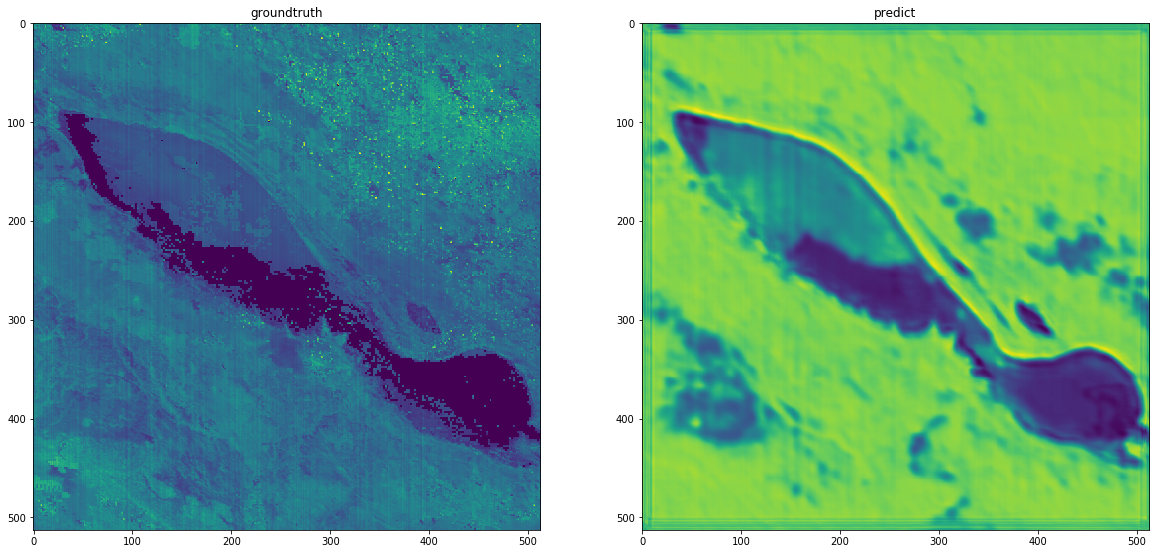

In [10]:
reservoir_index = 0
test_data, test_target = get_data(data_type='test', reservoirIndex=reservoir_index, timeSteps=timeSteps)
n = test_data.shape[0]
scaler = MinMaxScaler()

scaler.fit(test_data.reshape(test_data.shape[0]*\
                          test_data.shape[1]*test_data.shape[2],
                          test_data.shape[3]*test_data.shape[4]))
test_data = scaleAsTrain(test_data, scaler)
test_target = scaleAsTrain(test_target, scaler)

img_col = test_target.shape[1]
img_row = test_target.shape[2]
input_shape = (None, img_col, img_row, 1) 

model = createModel(filters, kernel_size, 
                    input_shape, n_hidden_layers)
model.compile(optimizer = "sgd", 
            loss = losses.mean_squared_error,
            metrics =["mse"])
model.load_weights(os.path.join('cache', 'model_weights.h5'))

which = np.random.randint(test_data.shape[0])
pred = model.predict(test_data[which][np.newaxis, :, :, :, :])
fig, ax = plt.subplots(1, 2, figsize=(20,20))

ax[0].imshow(test_target[which][:, :, 0])
ax[0].set_title('groundtruth')
ax[1].imshow(pred[0, :, :, 0])
ax[1].set_title('predict')

# Reservoir 1

Restore test from cache!


Text(0.5,1,'predict')

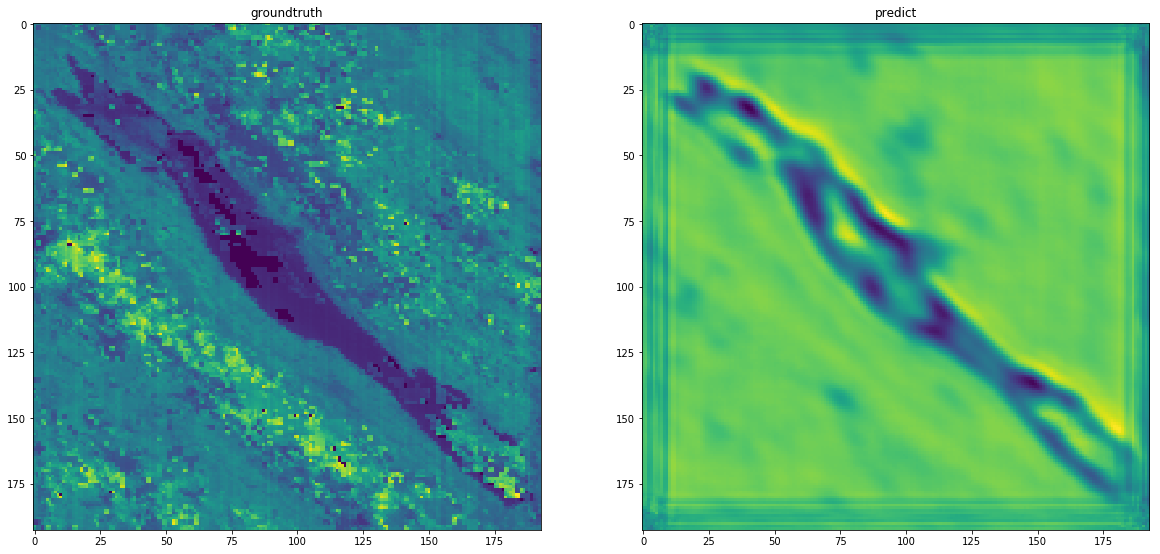

In [11]:
reservoir_index = 1
test_data, test_target = get_data(data_type='test', reservoirIndex=reservoir_index, timeSteps=timeSteps)
n = test_data.shape[0]
scaler = MinMaxScaler()

scaler.fit(test_data.reshape(test_data.shape[0]*\
                          test_data.shape[1]*test_data.shape[2],
                          test_data.shape[3]*test_data.shape[4]))
test_data = scaleAsTrain(test_data, scaler)
test_target = scaleAsTrain(test_target, scaler)

img_col = test_target.shape[1]
img_row = test_target.shape[2]
input_shape = (None, img_col, img_row, 1) 

model = createModel(filters, kernel_size, 
                    input_shape, n_hidden_layers)
model.compile(optimizer = "sgd", 
            loss = losses.mean_squared_error,
            metrics =["mse"])
model.load_weights(os.path.join('cache', 'model_weights.h5'))

which = np.random.randint(test_data.shape[0])
pred = model.predict(test_data[which][np.newaxis, :, :, :, :])
fig, ax = plt.subplots(1, 2, figsize=(20,20))

ax[0].imshow(test_target[which][:, :, 0])
ax[0].set_title('groundtruth')
ax[1].imshow(pred[0, :, :, 0])
ax[1].set_title('predict')

# Reservoir 2

Restore test from cache!


Text(0.5,1,'predict')

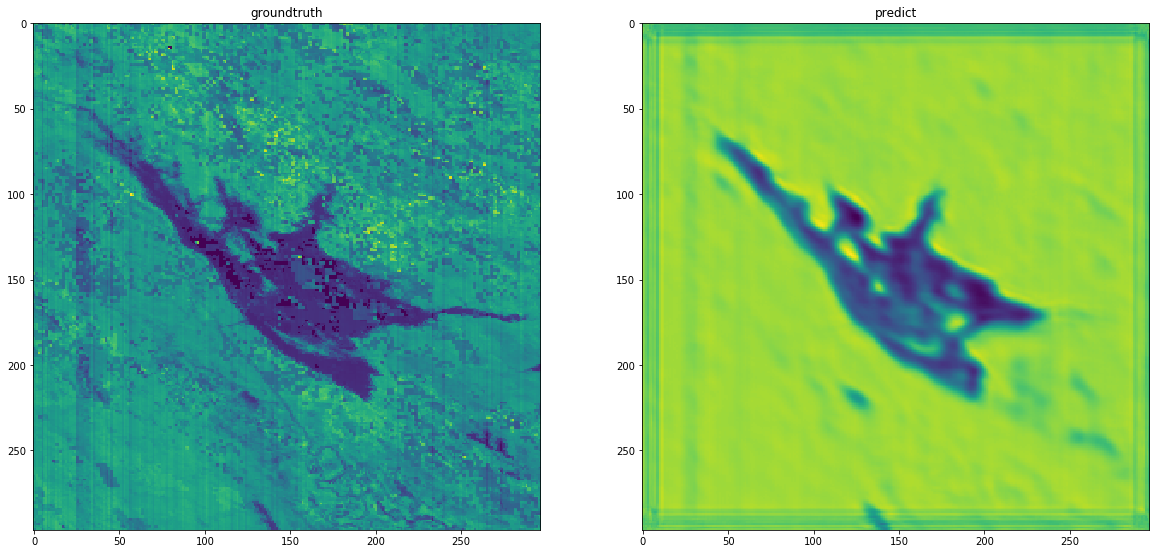

In [12]:
reservoir_index = 2
test_data, test_target = get_data(data_type='test', reservoirIndex=reservoir_index, timeSteps=timeSteps)
n = test_data.shape[0]
scaler = MinMaxScaler()

scaler.fit(test_data.reshape(test_data.shape[0]*\
                          test_data.shape[1]*test_data.shape[2],
                          test_data.shape[3]*test_data.shape[4]))
test_data = scaleAsTrain(test_data, scaler)
test_target = scaleAsTrain(test_target, scaler)

img_col = test_target.shape[1]
img_row = test_target.shape[2]
input_shape = (None, img_col, img_row, 1) 

model = createModel(filters, kernel_size, 
                    input_shape, n_hidden_layers)
model.compile(optimizer = "sgd", 
            loss = losses.mean_squared_error,
            metrics =["mse"])
model.load_weights(os.path.join('cache', 'model_weights.h5'))

which = np.random.randint(test_data.shape[0])
pred = model.predict(test_data[which][np.newaxis, :, :, :, :])
fig, ax = plt.subplots(1, 2, figsize=(20,20))

ax[0].imshow(test_target[which][:, :, 0])
ax[0].set_title('groundtruth')
ax[1].imshow(pred[0, :, :, 0])
ax[1].set_title('predict')

# Reservoir 3

Restore test from cache!


Text(0.5,1,'predict')

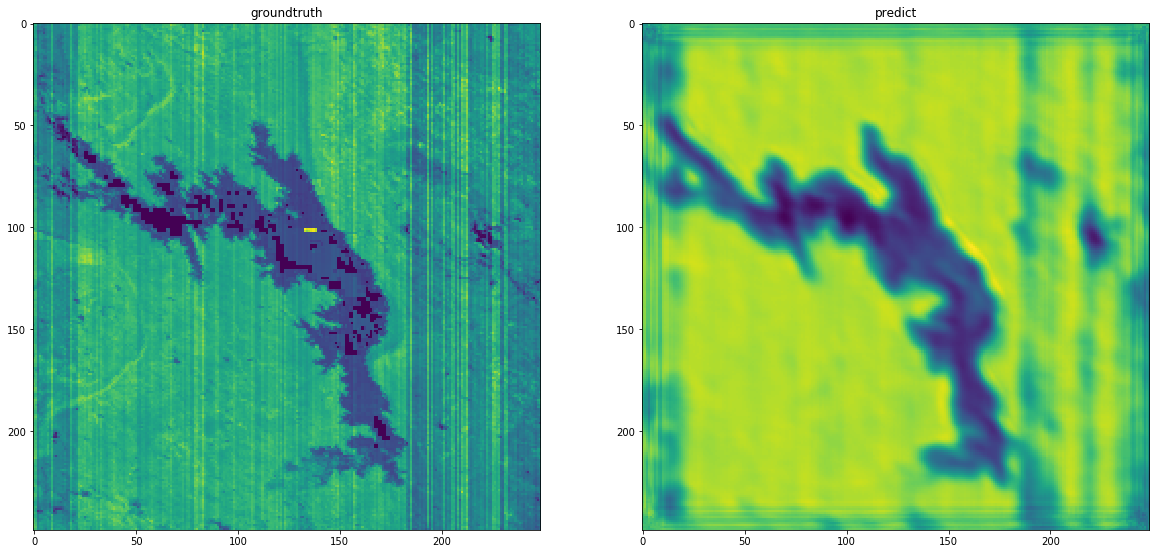

In [13]:
reservoir_index = 3
test_data, test_target = get_data(data_type='test', reservoirIndex=reservoir_index, timeSteps=timeSteps)
n = test_data.shape[0]
scaler = MinMaxScaler()

scaler.fit(test_data.reshape(test_data.shape[0]*\
                          test_data.shape[1]*test_data.shape[2],
                          test_data.shape[3]*test_data.shape[4]))
test_data = scaleAsTrain(test_data, scaler)
test_target = scaleAsTrain(test_target, scaler)

img_col = test_target.shape[1]
img_row = test_target.shape[2]
input_shape = (None, img_col, img_row, 1) 

model = createModel(filters, kernel_size, 
                    input_shape, n_hidden_layers)
model.compile(optimizer = "sgd", 
            loss = losses.mean_squared_error,
            metrics =["mse"])
model.load_weights(os.path.join('cache', 'model_weights.h5'))

which = np.random.randint(test_data.shape[0])
pred = model.predict(test_data[which][np.newaxis, :, :, :, :])
fig, ax = plt.subplots(1, 2, figsize=(20,20))

ax[0].imshow(test_target[which][:, :, 0])
ax[0].set_title('groundtruth')
ax[1].imshow(pred[0, :, :, 0])
ax[1].set_title('predict')

# Reservoir 4

Restore test from cache!


Text(0.5,1,'predict')

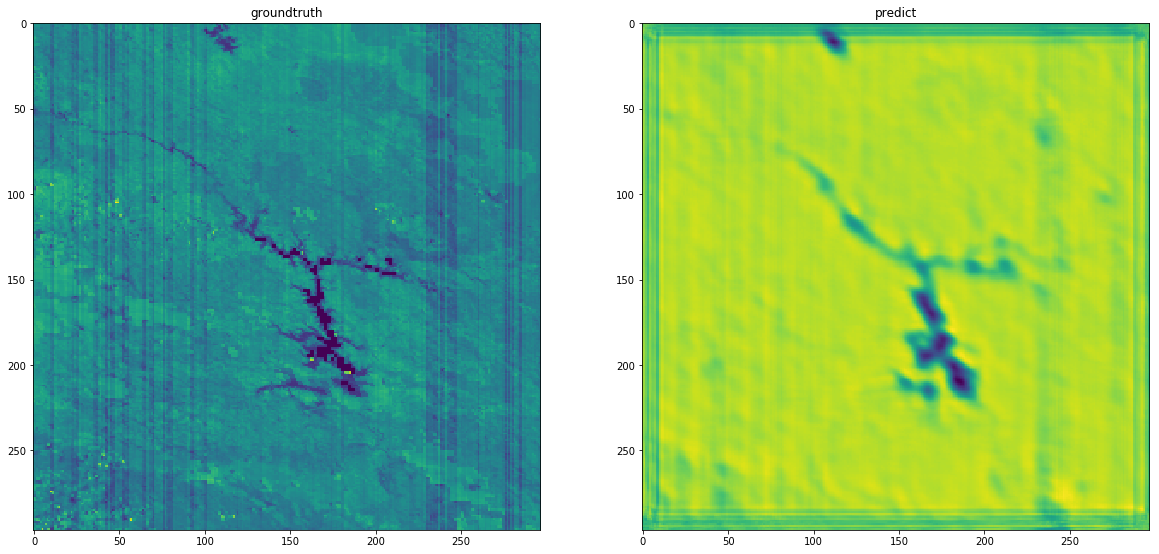

In [15]:
reservoir_index = 4
test_data, test_target = get_data(data_type='test', reservoirIndex=reservoir_index, timeSteps=timeSteps)
n = test_data.shape[0]
scaler = MinMaxScaler()

scaler.fit(test_data.reshape(test_data.shape[0]*\
                          test_data.shape[1]*test_data.shape[2],
                          test_data.shape[3]*test_data.shape[4]))
test_data = scaleAsTrain(test_data, scaler)
test_target = scaleAsTrain(test_target, scaler)

img_col = test_target.shape[1]
img_row = test_target.shape[2]
input_shape = (None, img_col, img_row, 1) 

model = createModel(filters, kernel_size, 
                    input_shape, n_hidden_layers)
model.compile(optimizer = "sgd", 
            loss = losses.mean_squared_error,
            metrics =["mse"])
model.load_weights(os.path.join('cache', 'model_weights.h5'))

which = np.random.randint(test_data.shape[0])
pred = model.predict(test_data[which][np.newaxis, :, :, :, :])
fig, ax = plt.subplots(1, 2, figsize=(20,20))

ax[0].imshow(test_target[which][:, :, 0])
ax[0].set_title('groundtruth')
ax[1].imshow(pred[0, :, :, 0])
ax[1].set_title('predict')

# Reservoir 5

Restore test from cache!


Text(0.5,1,'predict')

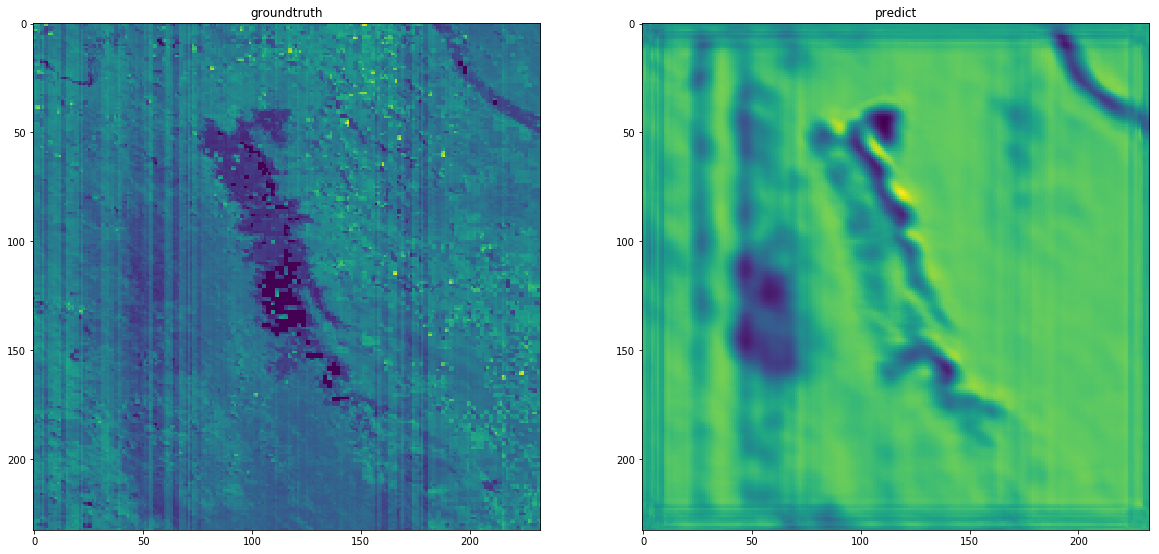

In [16]:
reservoir_index = 5
test_data, test_target = get_data(data_type='test', reservoirIndex=reservoir_index, timeSteps=timeSteps)
n = test_data.shape[0]
scaler = MinMaxScaler()

scaler.fit(test_data.reshape(test_data.shape[0]*\
                          test_data.shape[1]*test_data.shape[2],
                          test_data.shape[3]*test_data.shape[4]))
test_data = scaleAsTrain(test_data, scaler)
test_target = scaleAsTrain(test_target, scaler)

img_col = test_target.shape[1]
img_row = test_target.shape[2]
input_shape = (None, img_col, img_row, 1) 

model = createModel(filters, kernel_size, 
                    input_shape, n_hidden_layers)
model.compile(optimizer = "sgd", 
            loss = losses.mean_squared_error,
            metrics =["mse"])
model.load_weights(os.path.join('cache', 'model_weights.h5'))

which = np.random.randint(test_data.shape[0])
pred = model.predict(test_data[which][np.newaxis, :, :, :, :])
fig, ax = plt.subplots(1, 2, figsize=(20,20))

ax[0].imshow(test_target[which][:, :, 0])
ax[0].set_title('groundtruth')
ax[1].imshow(pred[0, :, :, 0])
ax[1].set_title('predict')

# Reservoir 6

Restore test from cache!


Text(0.5,1,'predict')

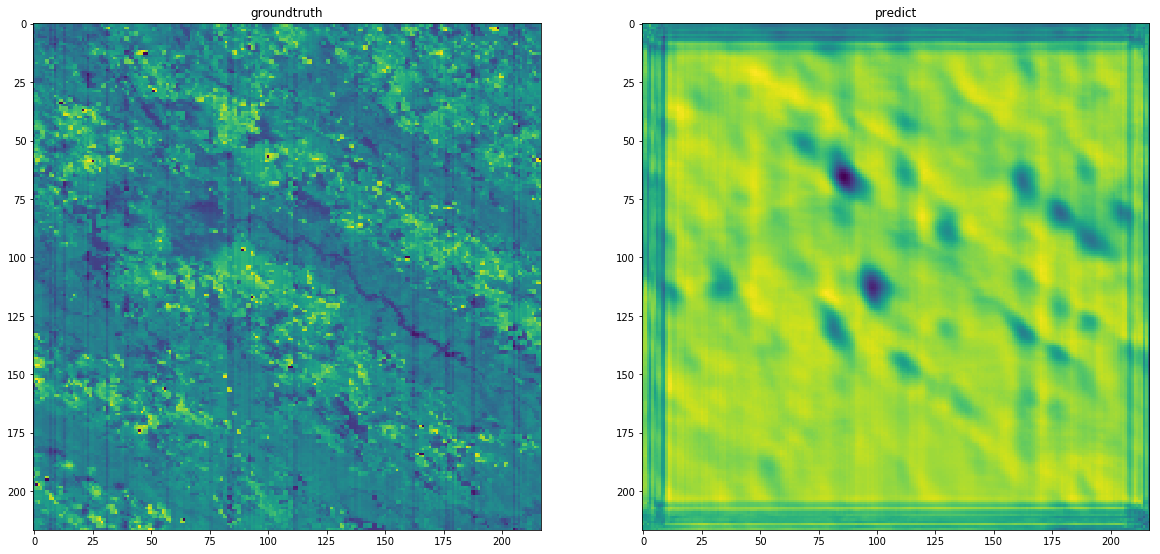

In [17]:
reservoir_index = 6
test_data, test_target = get_data(data_type='test', reservoirIndex=reservoir_index, timeSteps=timeSteps)
n = test_data.shape[0]
scaler = MinMaxScaler()

scaler.fit(test_data.reshape(test_data.shape[0]*\
                          test_data.shape[1]*test_data.shape[2],
                          test_data.shape[3]*test_data.shape[4]))
test_data = scaleAsTrain(test_data, scaler)
test_target = scaleAsTrain(test_target, scaler)

img_col = test_target.shape[1]
img_row = test_target.shape[2]
input_shape = (None, img_col, img_row, 1) 

model = createModel(filters, kernel_size, 
                    input_shape, n_hidden_layers)
model.compile(optimizer = "sgd", 
            loss = losses.mean_squared_error,
            metrics =["mse"])
model.load_weights(os.path.join('cache', 'model_weights.h5'))

which = np.random.randint(test_data.shape[0])
pred = model.predict(test_data[which][np.newaxis, :, :, :, :])
fig, ax = plt.subplots(1, 2, figsize=(20,20))

ax[0].imshow(test_target[which][:, :, 0])
ax[0].set_title('groundtruth')
ax[1].imshow(pred[0, :, :, 0])
ax[1].set_title('predict')

# Reservoir 7

Restore test from cache!


Text(0.5,1,'predict')

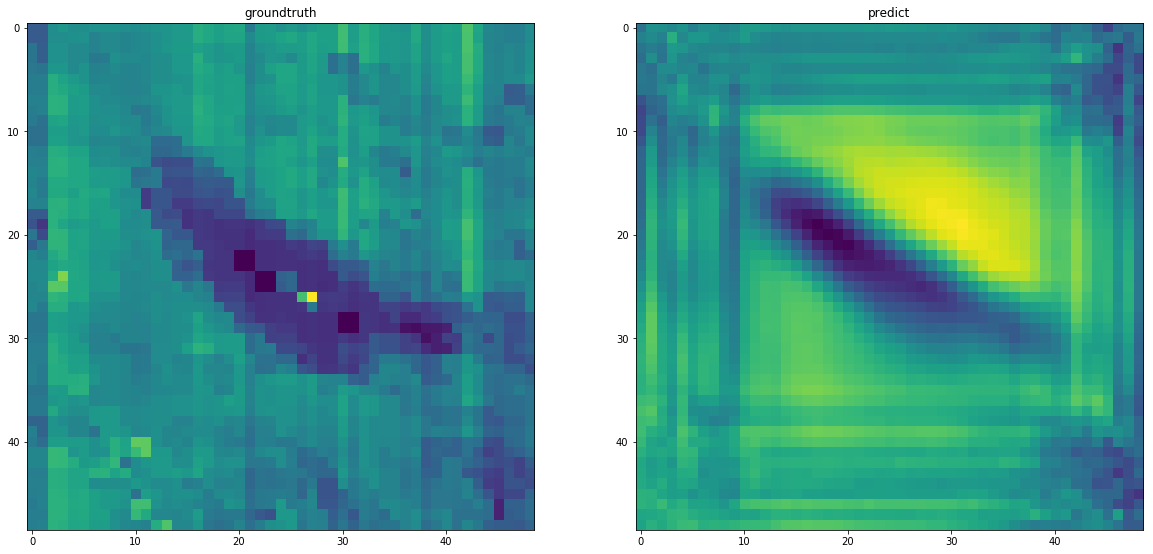

In [18]:
reservoir_index = 7
test_data, test_target = get_data(data_type='test', reservoirIndex=reservoir_index, timeSteps=timeSteps)
n = test_data.shape[0]
scaler = MinMaxScaler()

scaler.fit(test_data.reshape(test_data.shape[0]*\
                          test_data.shape[1]*test_data.shape[2],
                          test_data.shape[3]*test_data.shape[4]))
test_data = scaleAsTrain(test_data, scaler)
test_target = scaleAsTrain(test_target, scaler)

img_col = test_target.shape[1]
img_row = test_target.shape[2]
input_shape = (None, img_col, img_row, 1) 

model = createModel(filters, kernel_size, 
                    input_shape, n_hidden_layers)
model.compile(optimizer = "sgd", 
            loss = losses.mean_squared_error,
            metrics =["mse"])
model.load_weights(os.path.join('cache', 'model_weights.h5'))

which = np.random.randint(test_data.shape[0])
pred = model.predict(test_data[which][np.newaxis, :, :, :, :])
fig, ax = plt.subplots(1, 2, figsize=(20,20))

ax[0].imshow(test_target[which][:, :, 0])
ax[0].set_title('groundtruth')
ax[1].imshow(pred[0, :, :, 0])
ax[1].set_title('predict')

# Reservoir 8

Restore test from cache!


Text(0.5,1,'predict')

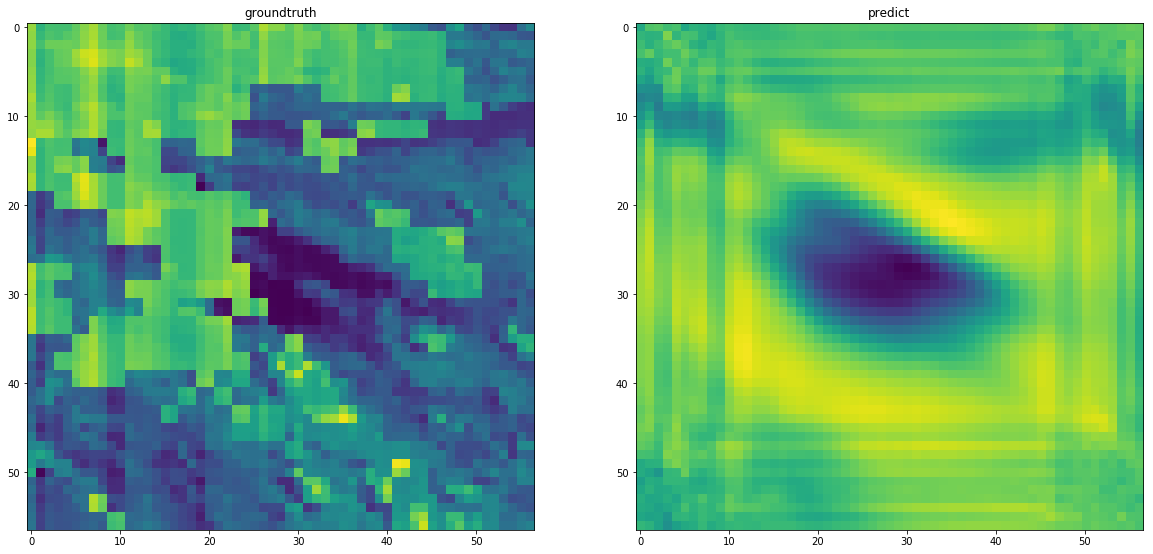

In [19]:
reservoir_index = 8
test_data, test_target = get_data(data_type='test', reservoirIndex=reservoir_index, timeSteps=timeSteps)
n = test_data.shape[0]
scaler = MinMaxScaler()

scaler.fit(test_data.reshape(test_data.shape[0]*\
                          test_data.shape[1]*test_data.shape[2],
                          test_data.shape[3]*test_data.shape[4]))
test_data = scaleAsTrain(test_data, scaler)
test_target = scaleAsTrain(test_target, scaler)

img_col = test_target.shape[1]
img_row = test_target.shape[2]
input_shape = (None, img_col, img_row, 1) 

model = createModel(filters, kernel_size, 
                    input_shape, n_hidden_layers)
model.compile(optimizer = "sgd", 
            loss = losses.mean_squared_error,
            metrics =["mse"])
model.load_weights(os.path.join('cache', 'model_weights.h5'))

which = np.random.randint(test_data.shape[0])
pred = model.predict(test_data[which][np.newaxis, :, :, :, :])
fig, ax = plt.subplots(1, 2, figsize=(20,20))

ax[0].imshow(test_target[which][:, :, 0])
ax[0].set_title('groundtruth')
ax[1].imshow(pred[0, :, :, 0])
ax[1].set_title('predict')

# Reservoir 9

Restore test from cache!


Text(0.5,1,'predict')

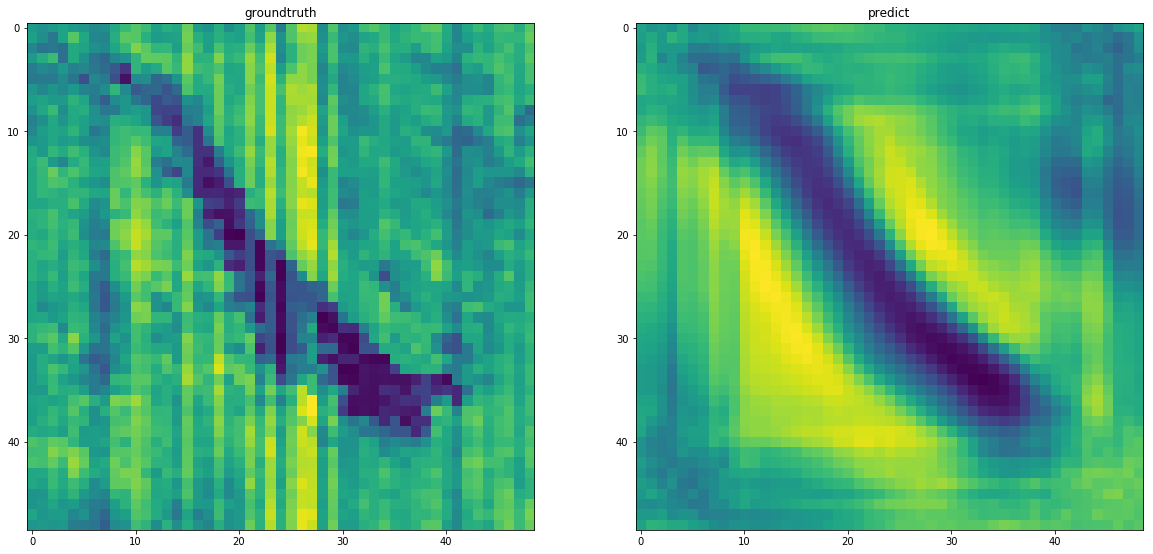

In [20]:
reservoir_index = 9
test_data, test_target = get_data(data_type='test', reservoirIndex=reservoir_index, timeSteps=timeSteps)
n = test_data.shape[0]
scaler = MinMaxScaler()

scaler.fit(test_data.reshape(test_data.shape[0]*\
                          test_data.shape[1]*test_data.shape[2],
                          test_data.shape[3]*test_data.shape[4]))
test_data = scaleAsTrain(test_data, scaler)
test_target = scaleAsTrain(test_target, scaler)

img_col = test_target.shape[1]
img_row = test_target.shape[2]
input_shape = (None, img_col, img_row, 1) 

model = createModel(filters, kernel_size, 
                    input_shape, n_hidden_layers)
model.compile(optimizer = "sgd", 
            loss = losses.mean_squared_error,
            metrics =["mse"])
model.load_weights(os.path.join('cache', 'model_weights.h5'))

which = np.random.randint(test_data.shape[0])
pred = model.predict(test_data[which][np.newaxis, :, :, :, :])
fig, ax = plt.subplots(1, 2, figsize=(20,20))

ax[0].imshow(test_target[which][:, :, 0])
ax[0].set_title('groundtruth')
ax[1].imshow(pred[0, :, :, 0])
ax[1].set_title('predict')

# Reservoir 10

Restore test from cache!


Text(0.5,1,'predict')

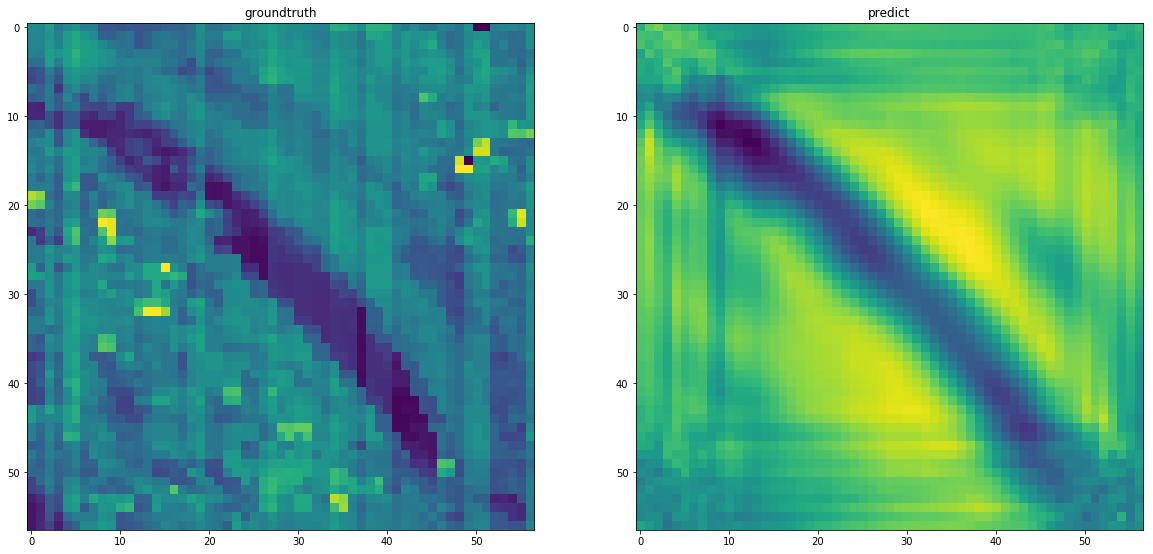

In [21]:
reservoir_index = 10
test_data, test_target = get_data(data_type='test', reservoirIndex=reservoir_index, timeSteps=timeSteps)
n = test_data.shape[0]
scaler = MinMaxScaler()

scaler.fit(test_data.reshape(test_data.shape[0]*\
                          test_data.shape[1]*test_data.shape[2],
                          test_data.shape[3]*test_data.shape[4]))
test_data = scaleAsTrain(test_data, scaler)
test_target = scaleAsTrain(test_target, scaler)

img_col = test_target.shape[1]
img_row = test_target.shape[2]
input_shape = (None, img_col, img_row, 1) 

model = createModel(filters, kernel_size, 
                    input_shape, n_hidden_layers)
model.compile(optimizer = "sgd", 
            loss = losses.mean_squared_error,
            metrics =["mse"])
model.load_weights(os.path.join('cache', 'model_weights.h5'))

which = np.random.randint(test_data.shape[0])
pred = model.predict(test_data[which][np.newaxis, :, :, :, :])
fig, ax = plt.subplots(1, 2, figsize=(20,20))

ax[0].imshow(test_target[which][:, :, 0])
ax[0].set_title('groundtruth')
ax[1].imshow(pred[0, :, :, 0])
ax[1].set_title('predict')

# Reservoir 11

Restore test from cache!


Text(0.5,1,'predict')

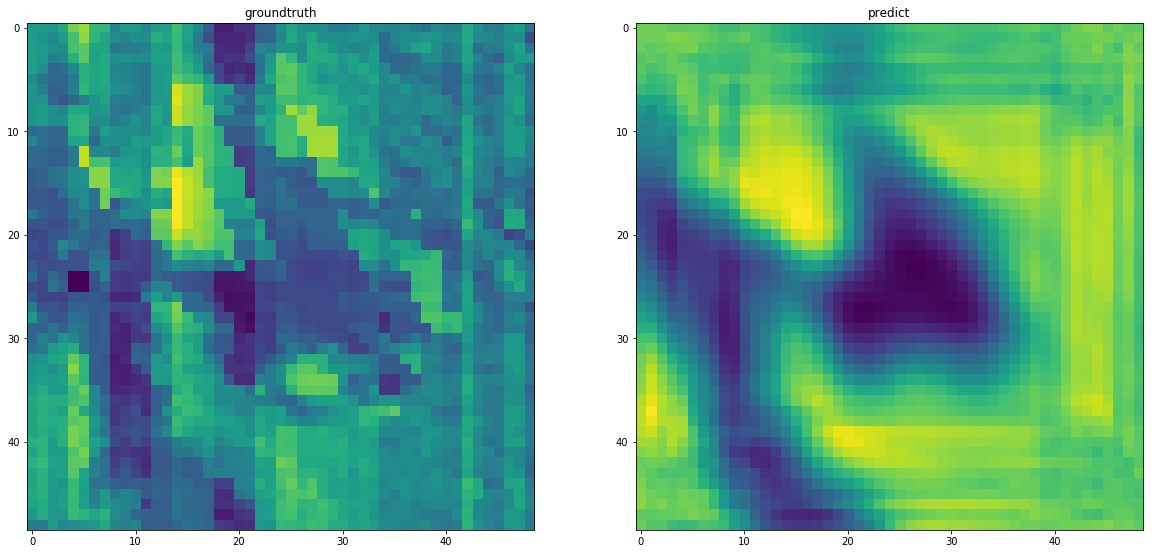

In [22]:
reservoir_index = 11
test_data, test_target = get_data(data_type='test', reservoirIndex=reservoir_index, timeSteps=timeSteps)
n = test_data.shape[0]
scaler = MinMaxScaler()

scaler.fit(test_data.reshape(test_data.shape[0]*\
                          test_data.shape[1]*test_data.shape[2],
                          test_data.shape[3]*test_data.shape[4]))
test_data = scaleAsTrain(test_data, scaler)
test_target = scaleAsTrain(test_target, scaler)

img_col = test_target.shape[1]
img_row = test_target.shape[2]
input_shape = (None, img_col, img_row, 1) 

model = createModel(filters, kernel_size, 
                    input_shape, n_hidden_layers)
model.compile(optimizer = "sgd", 
            loss = losses.mean_squared_error,
            metrics =["mse"])
model.load_weights(os.path.join('cache', 'model_weights.h5'))

which = np.random.randint(test_data.shape[0])
pred = model.predict(test_data[which][np.newaxis, :, :, :, :])
fig, ax = plt.subplots(1, 2, figsize=(20,20))

ax[0].imshow(test_target[which][:, :, 0])
ax[0].set_title('groundtruth')
ax[1].imshow(pred[0, :, :, 0])
ax[1].set_title('predict')

# Reservoir 12

Read test images.


Text(0.5,1,'predict')

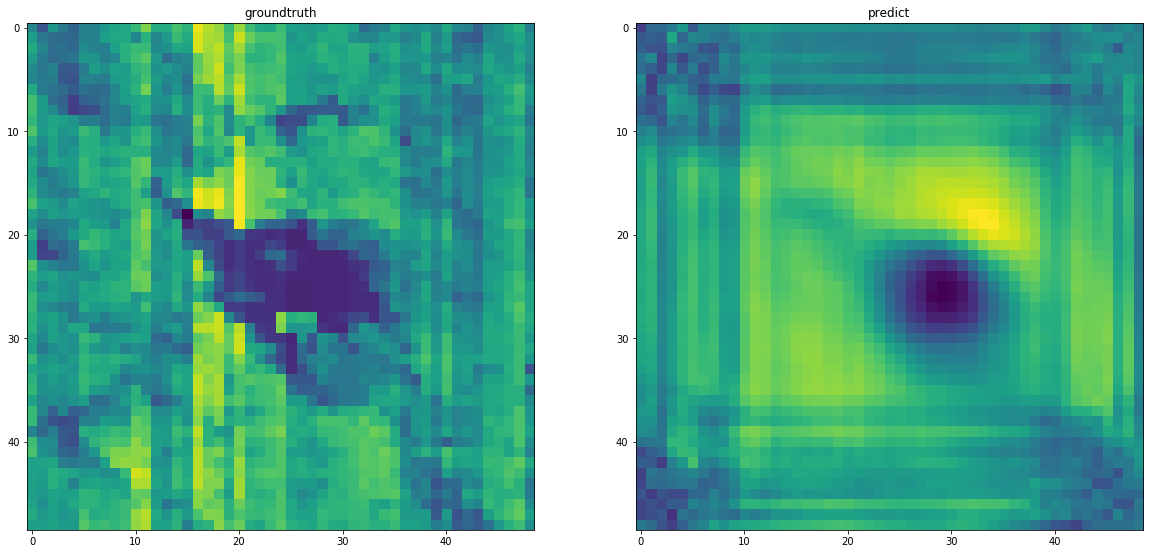

In [23]:
reservoir_index = 12
test_data, test_target = get_data(data_type='test', reservoirIndex=reservoir_index, timeSteps=timeSteps)
n = test_data.shape[0]
scaler = MinMaxScaler()

scaler.fit(test_data.reshape(test_data.shape[0]*\
                          test_data.shape[1]*test_data.shape[2],
                          test_data.shape[3]*test_data.shape[4]))
test_data = scaleAsTrain(test_data, scaler)
test_target = scaleAsTrain(test_target, scaler)

img_col = test_target.shape[1]
img_row = test_target.shape[2]
input_shape = (None, img_col, img_row, 1) 

model = createModel(filters, kernel_size, 
                    input_shape, n_hidden_layers)
model.compile(optimizer = "sgd", 
            loss = losses.mean_squared_error,
            metrics =["mse"])
model.load_weights(os.path.join('cache', 'model_weights.h5'))

which = np.random.randint(test_data.shape[0])
pred = model.predict(test_data[which][np.newaxis, :, :, :, :])
fig, ax = plt.subplots(1, 2, figsize=(20,20))

ax[0].imshow(test_target[which][:, :, 0])
ax[0].set_title('groundtruth')
ax[1].imshow(pred[0, :, :, 0])
ax[1].set_title('predict')